<a href="https://colab.research.google.com/github/rassyz/UAS_AI_Rasyid-Abdul-Rauf/blob/main/UAS_AI_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rasyid Abdul Ra'uf

NIM : 20220801026

Mata Kuliah : Artificial Intelligence

# **Langkah 1: Preprocessing Data**
Pada langkah ini, melakukan pembersihan dan persiapan data sebelum eksekusi Clustering.

## 1. Import Library
Memasukkan library yang dibutuhkan

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import kaleido

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Load Dataset Netflix

In [153]:
#Load Dataset

netflix_movies = df = pd.read_csv("netflix_titles.csv")
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 1.1 Visualisasi Menggunakan Donut/Pie Chart: Distribusi Film vs TV Show
Visualisasi perbandingan antara Film dan TV Show

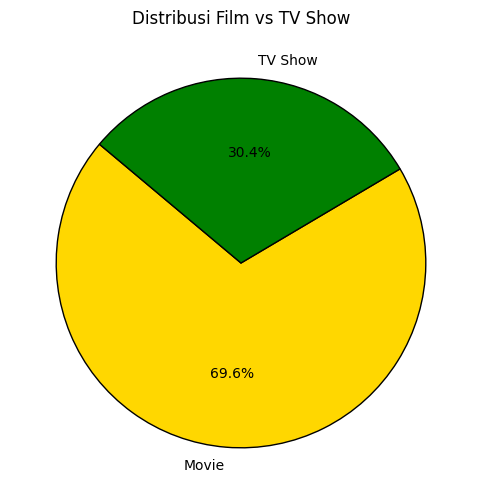

In [155]:
# Chart - 1 visualization code

# Pastikan urutan sesuai dengan hasil value_counts()
type_counts = netflix_movies['type'].value_counts()
labels = type_counts.index.tolist()
values = type_counts.values.tolist()

# Warna untuk masing-masing kategori
colors = ['gold', 'green']

# Membuat pie chart dengan Matplotlib
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Menambahkan judul
plt.title('Distribusi Film vs TV Show')

# Tampilkan chart
plt.show()



### 1.2 Visualisasi Diagram: Distribusi Tahun Rilis Netflix
Menunjukkan jumlah film dan TV show yang dirilis berdasarkan tahun.

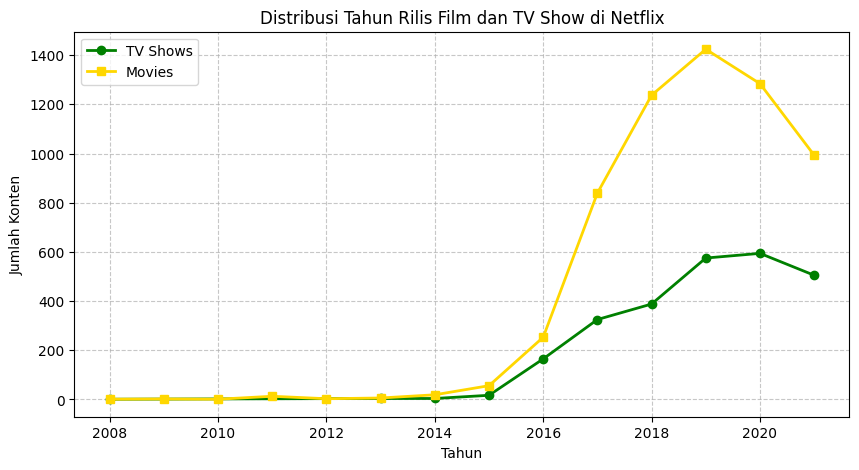

In [156]:
# Chart - 2 visualization code

# Copy subset untuk menghindari SettingWithCopyWarning
tv_show = netflix_movies[netflix_movies["type"] == "TV Show"].copy()
movie = netflix_movies[netflix_movies["type"] == "Movie"].copy()

# Konversi tanggal ke tahun
netflix_movies['year_added'] = pd.to_datetime(netflix_movies['date_added'], errors='coerce').dt.year
tv_show['year_added'] = pd.to_datetime(tv_show['date_added'], errors='coerce').dt.year
movie['year_added'] = pd.to_datetime(movie['date_added'], errors='coerce').dt.year

# Hapus nilai NaN setelah konversi
tv_show = tv_show.dropna(subset=['year_added'])
movie = movie.dropna(subset=['year_added'])

# Menghitung distribusi jumlah rilis per tahun
content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

# Membuat visualisasi dengan Matplotlib
plt.figure(figsize=(10,5))

# Plot untuk TV Shows
plt.plot(content_1.index, content_1.values, marker='o', linestyle='-', color='green', linewidth=2, label="TV Shows")

# Plot untuk Movies
plt.plot(content_2.index, content_2.values, marker='s', linestyle='-', color='gold', linewidth=2, label="Movies")

# Konfigurasi tampilan
plt.xlabel("Tahun")
plt.ylabel("Jumlah Konten")
plt.title("Distribusi Tahun Rilis Film dan TV Show di Netflix")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()



### 1.3 Visualisasi Diagram: Penambahan Film dan TV Show di Netflix Setiap Bulan
Menunjukkan diagram penambahan Film & TV Show setiap bulan

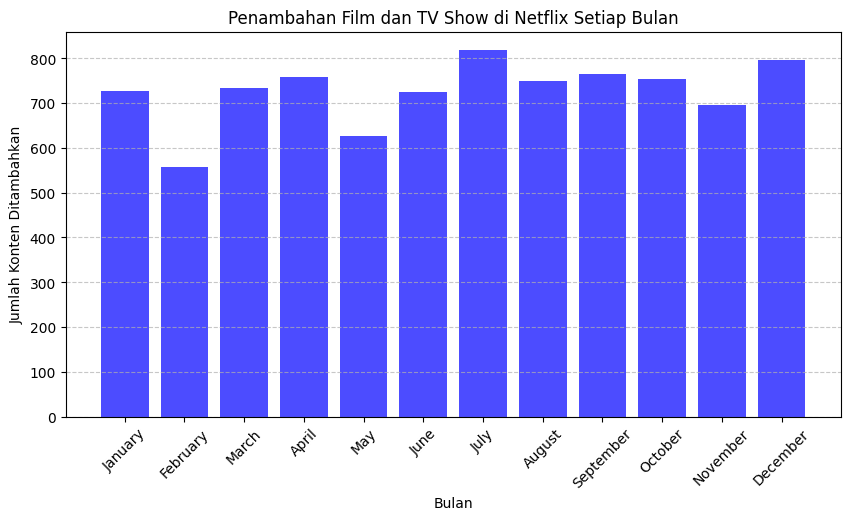

In [157]:
# Chart - 3 visualization code

# Konversi date_added ke datetime dan ekstrak bulan
netflix_movies['month_added'] = pd.to_datetime(netflix_movies['date_added'], errors='coerce').dt.month_name()

# Hapus nilai NaN setelah konversi
netflix_movies = netflix_movies.dropna(subset=['month_added'])

# Hitung jumlah penambahan konten per bulan
months_df = netflix_movies['month_added'].value_counts().reset_index()
months_df.columns = ['month', 'count']

# Mengurutkan nama bulan dalam urutan kalender
months_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
months_df['month'] = pd.Categorical(months_df['month'], categories=months_order, ordered=True)
months_df = months_df.sort_values('month')

# Membuat bar chart dengan Matplotlib
plt.figure(figsize=(10,5))
plt.bar(months_df['month'], months_df['count'], color='blue', alpha=0.7)

# Konfigurasi tampilan
plt.xlabel("Bulan")
plt.ylabel("Jumlah Konten Ditambahkan")
plt.title("Penambahan Film dan TV Show di Netflix Setiap Bulan")
plt.xticks(rotation=45)  # Rotasi label bulan agar lebih terbaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()


### 1.4 Visualisasi Diagram: Durasi vs Tahun Rilis
Menunjukkan hubungan antara durasi konten dengan tahun rilisnya.

<ipython-input-158-44da686aa33e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



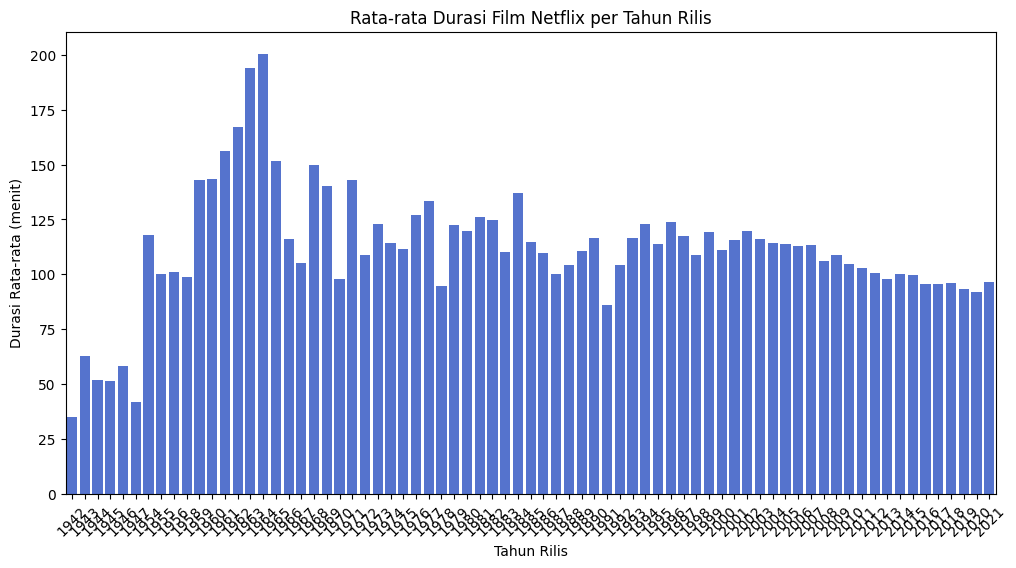

In [158]:
# Chart - 4 visualization code

# Memilih baris dengan 'Movie' di kolom 'type'
df_movies = df[df["type"] == "Movie"]
df_movies["duration"] = df_movies["duration"].str.replace(" min", "", regex=True).astype(float)

# Mengelompokkan data berdasarkan tahun dan menghitung durasi rata-rata
df_grouped = df_movies.groupby("release_year")["duration"].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df_grouped["release_year"], y=df_grouped["duration"], color="royalblue")

# Menambahkan judul dan label
plt.title("Rata-rata Durasi Film Netflix per Tahun Rilis")
plt.xlabel("Tahun Rilis")
plt.ylabel("Durasi Rata-rata (menit)")
plt.xticks(rotation=45)  # Memiringkan label agar lebih mudah dibaca

# Menampilkan plot
plt.show()


## 2. Hapus Kolom yang tidak digunakan atau tidak relevan
Kolom show_id, director, cast, description, date_added dan month_added. dihapus karena tidak diperlukan untuk clustering.

In [159]:
df_cleaned = df.drop(columns=["show_id", "director", "cast", "description", "date_added", "month_added"])

## 3. Hapus Baris/Kolom yang memiliki nilai kosong atau null
Menghapus baris/kolom yang memiliki data kosong agar analisis lebih akurat.

In [160]:
df_cleaned = df_cleaned.dropna()

## 4. Encoding data kategori ke angka
Kolom type, country, rating, dan listed_in diubah ke angka supaya bisa diproses oleh algoritma clustering.

In [161]:
encoder = LabelEncoder()
df_cleaned["type"] = encoder.fit_transform(df_cleaned["type"])
df_cleaned["country"] = encoder.fit_transform(df_cleaned["country"])
df_cleaned["rating"] = encoder.fit_transform(df_cleaned["rating"])
df_cleaned["listed_in"] = encoder.fit_transform(df_cleaned["listed_in"])

## 5. Konversi release_year dan duration ke angka
release_year diubah ke integer.
duration diekstrak angka saja (misalnya "90 min" jadi 90, "1 Season" jadi 1).

In [162]:
df_cleaned["release_year"] = df_cleaned["release_year"].astype(int)
df_cleaned["duration"] = df_cleaned["duration"].str.extract("(\d+)").astype(float)
df_cleaned = df_cleaned.dropna()

# **Langkah 2: Clustering menggunakan K-Means**
Setelah data siap, lanjut ke proses clustering menggunakan K-Means.

## 1. Normalisasi Data
Normalisasi dilakukan agar skala data lebih seimbang dan clustering lebih akurat.

In [163]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=["title"]))

## 2. Run K-Means Clustering
Menggunakan 3 klaster untuk mengelompokkan data.
Hasil klaster disimpan di kolom cluster.

In [164]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned["cluster"] = kmeans.fit_predict(df_scaled)


## 3. Output K-Means Clustering
Menampilkan jumlah data dalam setiap klaster.

In [165]:
df_cleaned["cluster"] = df_cleaned["cluster"].astype(int)

# Menghitung jumlah data per cluster
cluster_counts = df_cleaned["cluster"].value_counts().sort_index()

# Mengubah format DataFrame agar lebih mudah dibaca
df_cluster_summary = pd.DataFrame({
    "Count": cluster_counts.index,
    "Cluster": cluster_counts.values
})

df_cluster_summary = df_cluster_summary.sort_values(by="Cluster", ascending=False)

# Menampilkan hasil
print(df_cluster_summary)

   Count  Cluster
1      1     3910
0      0     2183
2      2     1783


### 3.1 PCA Scatter Plot: Visualisasi Clustering
Menggunakan PCA untuk mereduksi dimensi dan memplot hasil clustering.

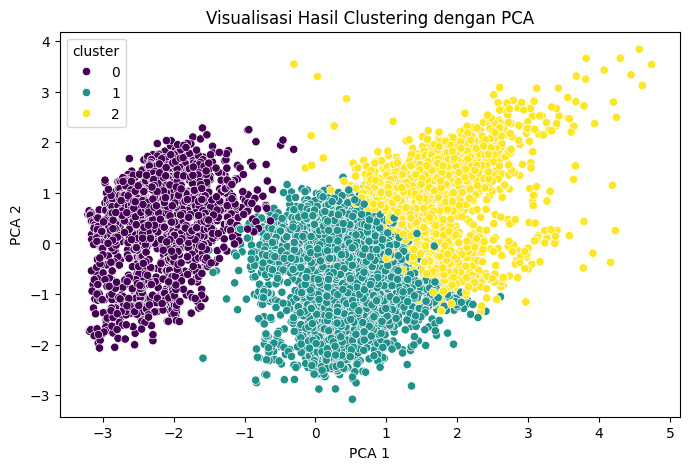

In [166]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)  # df_scaled = data yang sudah dinormalisasi

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned["cluster"], palette="viridis")
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### 3.2 Scatter Plot dengan Centroid (K-Means)
Menampilkan titik pusat (centroid) untuk tiap klaster hasil K-Means.

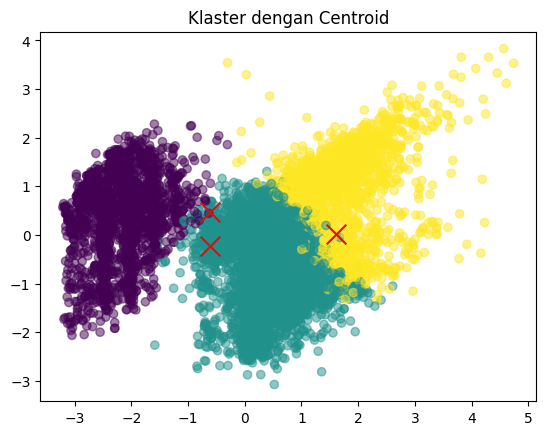

In [167]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned["cluster"], cmap="viridis", alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="x", s=200)
plt.title("Klaster dengan Centroid")
plt.show()

# **Langkah 3: Integrasi dengan Machine Learning**
Setelah clustering selesai, gunakan hasil klaster sebagai fitur tambahan dalam model Machine Learning.

##1. Pisahkan fitur dan target untuk model Machine Learning
*   X adalah fitur yang digunakan untuk prediksi.
*   y adalah label klaster.
*   Data dibagi menjadi 80% training dan 20% testing.



In [168]:
# Add the 'cluster' column to df_cleaned after prediction.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(df_scaled)

# Now you should be able to drop it.
X = df_cleaned.drop(columns=["title", "cluster"])  # Fitur
y = df_cleaned["cluster"]  # Target klaster

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##2. Latih model machine learning (K-Nearest Neighbors)
*   Menggunakan K-Nearest Neighbors (KNN) sebagai model sederhana.
*   Mengukur akurasi model.



In [169]:
# Add the 'cluster' column to df_cleaned after prediction.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(df_scaled)

# Now you should be able to drop it.
X = df_cleaned.drop(columns=["title", "cluster"])  # Fitur
y = df_cleaned["cluster"]  # Target klaster

# Check for columns with object dtype (likely containing strings)
object_columns = X.select_dtypes(include=['object']).columns

# If there are object columns, apply Label Encoding or One-Hot Encoding
for col in object_columns:
    # Using Label Encoding for demonstration
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])

# --- Split data after encoding ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with model training
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model:", acc)

Akurasi Model: 0.9118020304568528


# **Langkah 4: Evaluasi dan Pengoptimalan**
Langkah terakhir adalah evaluasi performa model.

##1. Evaluasi akurasi, precision, dan recall
Menampilkan metrik evaluasi seperti precision, recall, dan F1-score.

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       434
           1       0.89      0.94      0.91       797
           2       0.85      0.75      0.80       345

    accuracy                           0.91      1576
   macro avg       0.91      0.89      0.90      1576
weighted avg       0.91      0.91      0.91      1576



### 1.1 Confusion Matrix: Evaluasi Model Klasifikasi
Menampilkan matriks kesalahan untuk melihat prediksi yang benar dan salah.

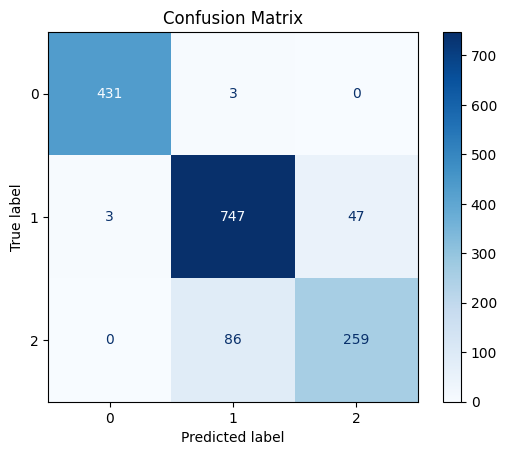

In [171]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

##2. Bandingkan dengan model tanpa clustering

In [172]:
# Assuming 'type' is the column with the string 'TV Show'
# Convert 'type' column to numerical using Label Encoding:
from sklearn.preprocessing import LabelEncoder

# ... (rest of your code) ...

X_no_cluster = df_cleaned.drop(columns=["title", "cluster"])

# --- Apply Label Encoding to categorical columns ---
for column in X_no_cluster.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    X_no_cluster[column] = encoder.fit_transform(X_no_cluster[column])

# Now, re-split your data into training and testing sets:
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_no_cluster, y, test_size=0.2, random_state=42
)

# Proceed with model training:
model_nc = KNeighborsClassifier(n_neighbors=5)
model_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = model_nc.predict(X_test_nc)
acc_nc = accuracy_score(y_test_nc, y_pred_nc)
print("Akurasi Model tanpa Clustering:", acc_nc)

Akurasi Model tanpa Clustering: 0.9118020304568528


# **Kesimpulan dari perbandingan model:**
Clustering menggunakan K-Means dalam analisis dataset Netflix memberikan wawasan eksploratif terkait distribusi data berdasarkan fitur seperti tahun rilis dan durasi. Namun, penerapannya tidak secara signifikan meningkatkan performa model klasifikasi. Model tanpa proses clustering tetap mampu melakukan prediksi dengan akurasi tinggi, yang mengindikasikan bahwa fitur yang tersedia sudah cukup kuat untuk membedakan kategori. Dengan demikian, model dapat dengan mudah mengenali pola dalam dataset tanpa perlu bantuan tambahan dari teknik clustering.

